# Project 02 - Image Processing

## Student Information

- Full name: Đinh Nguyễn Gia Bảo
- Student ID: 22127027
- Class: 22CLC03

## Required Libraries

In [62]:
# IMPORT YOUR LIBS HERE
import numpy as np #For calculate matrix
from PIL import Image, ImageEnhance #pip install Pillow, use for read and write image
import matplotlib.pyplot as plt #For display image

## Function Definitions

In [63]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    #Read image from img_path
    img = Image.open(img_path)
    #Convert image to 2D array
    img_2d = np.array(img)

    return img_2d

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    #Display image
    plt.imshow(img)

    #Turn off axis -> not display axis -> make image look better
    plt.axis('off')

    #Display image
    plt.show()

def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    #Convert 2D array to image by using Image.fromarray
    img = Image.fromarray(img.astype('uint8'))

    #Save image in png and pdf format
    img.save(img_path + '.png')
    img.save(img_path + '.pdf')

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def setBrightness(img, brightness):
    '''
    Set brightness for image

    Parameters
    ----------
    img : <your type>
        Image
    brightness : int
        Brightness value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    
    # Bước 2: Tạo một mảng chứa giá trị độ sáng mới
    brightness_array = np.full(img.shape, brightness, dtype=np.int16)
    
    # Bước 3: Thực hiện phép cộng mảng độ sáng với mảng ảnh ban đầu
    img_enhanced = img.astype(np.int16) + brightness_array
    
    # Bước 4: Giới hạn giá trị của mỗi điểm ảnh vào trong khoảng [0, 255]
    img_enhanced = np.clip(img_enhanced, 0, 255)
    
    # Bước 5: Chuyển đổi bức ảnh về dạng uint8
    img_enhanced = img_enhanced.astype(np.uint8)
    
    return img_enhanced

def setContrast(img, contrast):
    '''
    Set contrast for image

    Parameters
    ----------
    img : <your type>
        Image
    contrast : int
        Contrast value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Bước 1: Đảm bảo giá trị contrast nằm trong khoảng [-100, 100]
    contrast = np.clip(contrast, -100, 100)

    # Bước 2: Chuyển đổi giá trị contrast từ phần trăm sang hệ số
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

    # Bước 3: Áp dụng điều chỉnh contrast cho ảnh
    mean = np.mean(img, axis=(0, 1), keepdims=True)  # Tính giá trị trung bình của ảnh
    img_enhanced = factor * (img - mean) + mean

    # Bước 4: Giới hạn giá trị của mỗi điểm ảnh vào trong khoảng [0, 255]
    img_enhanced = np.clip(img_enhanced, 0, 255).astype(np.uint8)

    return img_enhanced

def flip_horizontal(img):
    # Bước 2: Lật ảnh theo chiều ngang
    img_flipped = img[:, ::-1]
    
    # Bước 3: Chuyển đổi bức ảnh về dạng uint8
    img_flipped = img_flipped.astype(np.uint8)
    
    return img_flipped

def flip_vertical(img):
    # Bước 2: Lật ảnh theo chiều dọc
    img_flipped = img[::-1, :]
    
    # Bước 3: Chuyển đổi bức ảnh về dạng uint8
    img_flipped = img_flipped.astype(np.uint8)
    
    return img_flipped

def rgb2grayscale(img):
    # Bước 2: Mảng trọng số cho R, G, B
    r_weight, g_weight, b_weight = 0.299, 0.587, 0.114

    # Bước 3: Trích dẫn 3 kênh màu (RGB)
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    # Bước 4: Thực hiện tích vô hướng (dot product) giữa các giá trị trong kênh màu với trọng số tương ứng
    grayscale_img = (r_weight * red_channel + g_weight * green_channel + b_weight * blue_channel)

    # Bước 6: Giới hạn các giá trị điểm ảnh vào khoảng [0, 255] và chuyển đổi bức ảnh về dạng uint8
    grayscale_img = np.clip(grayscale_img, 0, 255).astype(np.uint8)

    return grayscale_img

def convertToSepia(img):
    '''
    Convert image to sepia

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Bước 2: Ma trận sepia
    sepia_matrix = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    
    # Bước 3: Thực hiện tích vô hướng giữa hình ảnh gốc và ma trận chuyển đổi sepia hoán vị
    sepia_img = img.dot(sepia_matrix.T)

    # Bước 4: Giới hạn các giá trị điểm ảnh vào khoảng [0, 255] và chuyển đổi bức ảnh về dạng uint8
    sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

    return sepia_img

def rgb2grayscale(img):
    r_weight, g_weight, b_weight = 0.299, 0.587, 0.114
    grayscale_img = (r_weight * img[:, :, 0] + g_weight * img[:, :, 1] + b_weight * img[:, :, 2])
    grayscale_img = np.clip(grayscale_img, 0, 255).astype(np.uint8)
    return grayscale_img

def apply_kernel(img, kernel):
    img_height, img_width = img.shape
    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    blurred_img = np.zeros_like(img)

    for i in range(img_height):
        for j in range(img_width):
            blurred_img[i, j] = np.sum(padded_img[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    blurred_img = np.clip(blurred_img, 0, 255).astype(np.uint8)
    return blurred_img

def blurImage(img, r):
    # Bước 2: Tính toán kích thước của kernel
    kernel_size = 2 * r + 1

    # Bước 3: Khởi tạo kernel
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    # Bước 4: Chuyển đổi ảnh về dạng grayscale
    grayscale_img = rgb2grayscale(img)

    # Bước 6: Áp dụng kernel để làm mờ ảnh
    blurred_img = apply_kernel(grayscale_img, kernel)

    return blurred_img

def sharpenImage(img):
    # Bước 2: Khởi tạo kernel làm nét ảnh
    kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    # Bước 3: Chuyển đổi ảnh về dạng grayscale
    grayscale_img = rgb2grayscale(img)

    # Bước 5: Áp dụng kernel để làm nét ảnh
    sharpened_img = apply_kernel(grayscale_img, kernel)

    return sharpened_img

def cropImageBySize(img, size=250):
    # Bước 2: Lấy kích thước của bức ảnh
    height, width = img.shape[:2]

    # Kiểm tra kích thước cần cắt
    if size > height or size > width:
        raise ValueError("Kích thước cần cắt lớn hơn kích thước ảnh hiện tại.")

    # Bước 3: Tính toán các vị trí cắt
    top = (height - size) // 2
    bottom = top + size
    left = (width - size) // 2
    right = left + size

    # Bước 4: Cắt ảnh
    crop_img = img[top:bottom, left:right]

    # Bước 5: Chuyển đổi bức ảnh về dạng uint8
    crop_img = np.clip(crop_img, 0, 255).astype(np.uint8)

    return crop_img

def cropToCirlceFrame(img):
    # Bước 2: Tính tọa độ tâm điểm và bán kính của hình tròn
    height, width = img.shape[:2]
    center_y, center_x = height // 2, width // 2
    radius = min(width, height) // 2

    # Bước 3: Tạo hai mảng 2D đại diện cho lưới các điểm ảnh
    y, x = np.ogrid[:height, :width]

    # Bước 4: Tính khoảng cách Euclidean từ mỗi điểm ảnh đến tâm của ảnh
    distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # Tạo mặt nạ hình tròn
    circular_mask = distance_from_center <= radius

    # Bước 5: Áp dụng mặt nạ để đặt giá trị các điểm ảnh nằm bên ngoài vùng hình tròn thành 0
    circular_img = np.zeros_like(img)
    circular_img[circular_mask] = img[circular_mask]

    return circular_img

def cropImageToElipFrame(img):

    # Get the height and width of the image
    h, w, _ = img.shape

    # Create a copy of the original image to apply the mask on
    ellipses_img = img.copy()

    # Calculate the center of the image
    center_x, center_y = w // 2, h // 2

    # Define the semi-major and semi-minor axes of the ellipses
    s_major = w
    s_minor = w / (np.sqrt(2) + 1)

    # Create two 2D arrays Y and X representing the grid of pixels
    y, x = np.ogrid[:h, :w]

    # Calculate dist1 and dist2 for mask calculations
    dist1 = (x - center_x) + (y - center_y)
    dist2 = (x - center_x) - (y - center_y)

    # Calculate the boolean masks for the two ellipses
    mask1 = ((dist1**2 / (s_minor * np.sqrt(2))) + (dist2**2 / (s_major * np.sqrt(2)))) <= 1
    mask2 = ((dist2**2 / (s_minor * np.sqrt(2))) + (dist1**2 / (s_major * np.sqrt(2)))) <= 1

    # Combine the masks using logical OR
    combined_mask = mask1 | mask2

    # Apply the combined mask to the image: set pixels outside the ellipses to 0
    ellipses_img[~combined_mask] = 0

    return ellipses_img

def zoomImage(img, ratio):

def doAllFunction(img):

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

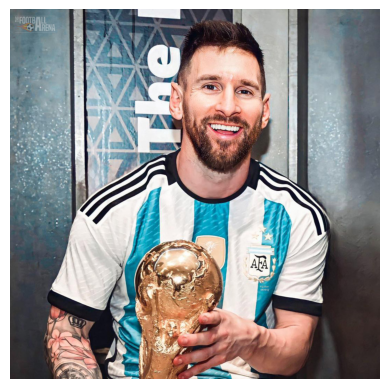

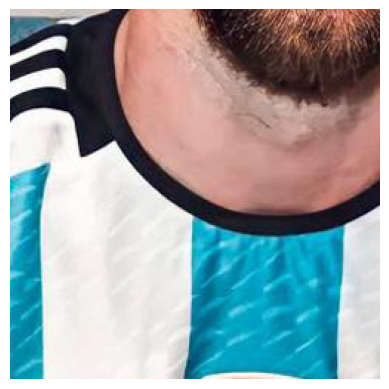

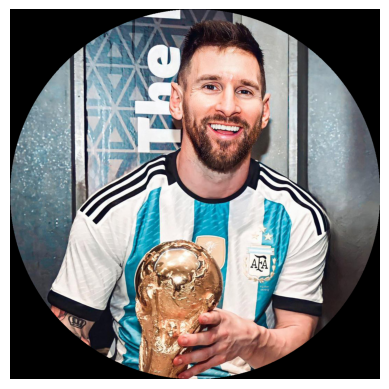

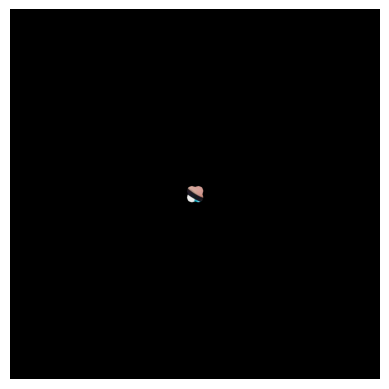

In [64]:
# YOUR CODE HERE

myArr = read_img('messi.jpg')
show_img(myArr)

#BRIGHTNESS
# # myArr2 = setBrightness(myArr, -50)
# # show_img(myArr2)

# myArr3 = setBrightness(myArr, 50)
# show_img(myArr3)

# myArr4 = setBrightness(myArr, -50)
# show_img(myArr4)

#CONTRAST
# myArr2 = setContrast(myArr, 50)
# show_img(myArr2)

# myArr3 = setContrast(myArr, -50)
# show_img(myArr3)

#Flip
# Lật ảnh theo chiều ngang
# horizontal_flipped_image = flip_horizontal(myArr)
# show_img(horizontal_flipped_image)

# # Lật ảnh theo chiều dọc
# vertical_flipped_image = flip_vertical(myArr)
# show_img(vertical_flipped_image)

#Convert to gray

#Convert to sepia
# sepia_image = convertToSepia(myArr)
# show_img(sepia_image)

#Blur
# r = 2  # Bán kính kernel
# blurred_image = blur_image(myArr, r)
# show_img(blurred_image)

#Sharpen
# sharpened_image = sharpen_image(myArr)
# show_img(sharpened_image)

#Crop
crop_image = crop_image(myArr, 250)
show_img(crop_image)

#Crop to circle
circular_image = crop_to_circle(myArr)
show_img(circular_image)

#Crop to ellipses
ellipses_image = ellipses_crop(myArr)
show_img(ellipses_image)

## Main FUNCTION

In [65]:
# YOUR CODE HERE
def main():
  # Enter image name
  img_name = input('Enter image name: ')

  # Open and convert the image to a numpy array
  my_img = read_img(img_name)

  # User choose the function
  print("""
  0. Do all functions! (With default settings)
  1. Adjust brightness (Default = +50)
  2. Adjust contrast (Default = +50)
  3. Flip image (Horizontal/Vertical)
  4. Grayscale/Sepia
  5. Blur/Sharpen image
  6. Crop image (Default 250x250)
  7. Circular crop
  8. Ellipses crop
  9. Zoom image (in/out) (Default = 2x)
  10. Exit """)

  choice = int(input("Your choice: "))

  # Proces the user choice
  if choice == 0:
    doAllFunction(my_img)
  elif choice == 1:
    brightness = int(input("Enter brightness level [-255; 255]: "))
    my_img = setBrightness(my_img, brightness)
    show_img(my_img)
  elif choice == 2:
    contrast = int(input("Enter contrast level [-255; 255]: "))
    my_img = setContrast(my_img, contrast)
    show_img(my_img)
  elif choice == 3:
    flip_choice = int(input("1. horizontal, 2.vertical"))
    if flip_choice == 1:
      my_img = flip_horizontal(my_img)
    elif flip_choice == 2:
      my_img = flip_vertical(my_img)
    show_img(my_img)
  elif choice == 4:
    sepia = int(input("1. Grayscale, 2. Sepia"))
    if sepia == 1:
      my_img = rgb2grayscale(my_img)
    elif sepia == 2:
      my_img = convertToSepia(my_img)
    show_img(my_img)
  elif choice == 5:
    blur_sharpen = int(input("1. Blur, 2. Sharpen"))
    if blur_sharpen == 1:
      my_img = blurImage(my_img, 2)
    elif blur_sharpen == 2:
      my_img = sharpenImage(my_img)
    show_img(my_img)
  elif choice == 6:
    size = int(input("Enter size: "))
    my_img = cropImageBySize(my_img, size)
    show_img(my_img)
  elif choice == 7:
    my_img = cropToCirlceFrame(my_img)
    show_img(my_img)
  elif choice == 8:
    my_img = cropImageToElipFrame(my_img)
    show_img(my_img)
  elif choice == 9:
    zoom = int(input("Enter zoom level: "))
    my_img = zoomImage(my_img, zoom)
    show_img(my_img)
  elif choice == 10:
    return

In [66]:
# Call main function
main()